In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

%matplotlib

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

Using matplotlib backend: TkAgg


In [2]:
def filterTempSignal(temperature, kernel = 101):
    return medfilt(temperature, kernel_size = kernel)

def saveFig(name, dpi = 300):
    plt.savefig(name, dpi = dpi)

In [3]:
cal00 = np.genfromtxt("JBCAL00.ASC", usecols = range(3), skip_header = 5, delimiter = "\t")
cal01 = np.genfromtxt("JBCAL01.ASC", usecols = range(3), skip_header = 5, delimiter = "\t")

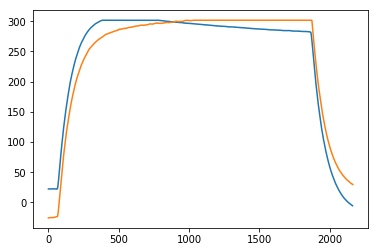

In [4]:
plt.plot(cal00[:, 0], cal00[:, 1])
plt.plot(cal01[:, 0], cal01[:, 1])

plt.show()

In [5]:
T = np.genfromtxt("Temperatures00-01.csv", usecols = range(6), skip_header = 1, delimiter = ',')

In [6]:
t = T[:, 0]
T_bath = filterTempSignal(T[:, 1])
T_ebath = filterTempSignal(T[:, 3])
T_ambient = filterTempSignal(T[:, 5])

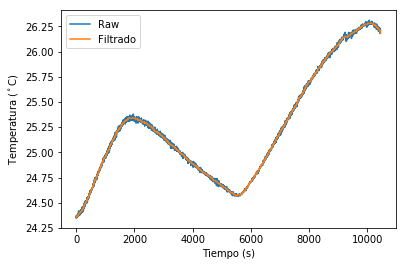

In [7]:
plt.plot(t, T[:, 1], label = "Raw")
plt.plot(t, T_bath, label = "Filtrado")

plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura ($^\circ$C)")

plt.legend()

saveFig("FiltradoEffect.png")
plt.show()

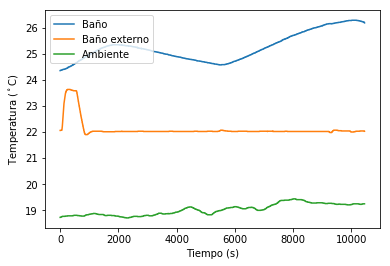

In [8]:
plt.plot(t, T_bath, label = 'Baño')
plt.plot(t, T_ebath, label = 'Baño externo')
plt.plot(t, T_ambient, label = 'Ambiente')

plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura ($^\circ$C)")

plt.legend()

saveFig("Temperaturas.png")
plt.show()

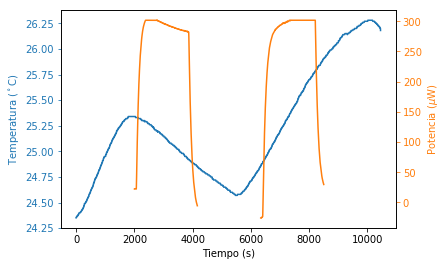

In [9]:
fig, ax1 = plt.subplots(1)

ax2 = ax1.twinx()

ax1.plot(t, T_bath, c = COLORS[0])
ax1.set_ylabel('Temperatura ($^\circ$C)', color = COLORS[0])
ax1.tick_params('y', colors = COLORS[0])

t_in_0 = 2000
t_in_1 = 6340

ax2.plot(cal00[:, 0] + t_in_0, cal00[:, 1], c = COLORS[1])
ax2.plot(cal01[:, 0] + t_in_1, cal01[:, 1], c = COLORS[1])

ax2.set_ylabel('Potencia ($\mu$W)', color = COLORS[1])
ax2.tick_params('y', colors = COLORS[1])

ax1.set_xlabel('Tiempo (s)')

saveFig("Cal00-01.png")
plt.show()